# Climate change's effect on local food and water resources. 📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

This project will attempt to address if localized climate change has a detrimental effect on local crop production and water resources.

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

1. Is climate change happening in my local area of Southeast Indiana?
2. Is climate change affecting the yield production of local crops, e.g., corn and soybean?
3. Is climate change affecting the water resources, i.e., is there an abundance or scarcity of water based on the amount of yearly rainfall? 

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

I hypothesize that climate change is occuring in Southeast Indiana, and it has affected local crop yield and reduced a percentage of available water resources.

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

1. United States Department of Agriculture (USDA) - https://quickstats.nass.usda.gov
2. Local Climate Analysis Tool (LCAT) - https://lcat.nws.noaa.gov/home
3. National Centers for Environmental Information | Local Climatological Data (LCD) - https://www.ncei.noaa.gov/cdo-web/datatools/lcd
4. USA Facts - Ripley County, Indiana - https://usafacts.org/issues/climate/state/indiana/county/ripley-county/?endDate=2023-11-18&startDate=2013-02-01#climate/

I will relate these data sets by geographical locations, either at the state level or preferably at the county level. 

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

My approach is to join the climate data set to the agricultural data set on the specified region, Southeast Indiana.  I need to fully understand the NOAA weather data's schema to determine if my county, Ripley, is included in the Wilmington Station, which it should be.

Once I have identified that Wilmington Weather Station does indeed cover my local area, I will attempt to extrapolate the annual rainfall and temperature data to determine if there is a correlation between weather and crop yield.

# Import Packages/Libraries

In [79]:
# Start your code here

import pandas as pd
import numpy as np

import os
from dotenv import load_dotenv

# Load the project environment variables
load_dotenv(override=True)

import requests
from urllib.request import urlretrieve, urlparse
from bs4 import BeautifulSoup

# Configure pandas to display 500 rows; otherwise it will truncate the output
pd.set_option('display.max_rows', 500)

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns



# Data Set: USDA National Agricultural Statistics Service (NASS)

### Data Source

"This product uses the NASS API but is not endorsed or certified by NASS."

In [80]:
# API KEY obtained from https://quickstats.nass.usda.gov/api/
API_KEY = os.getenv('API_KEY')

In [81]:
# URL='https://quickstats.nass.usda.gov/results/5707E545-6B9E-35A4-AF77-DAF0BA7D7A7B'

In [82]:
# API documentation: https://quickstats.nass.usda.gov/api
# Example URL = 'https://quickstats.nass.usda.gov/api/api_GET/?key=API_KEY&commodity_desc=CORN&year__GE=2010&state_alpha=VA'

url = 'https://quickstats.nass.usda.gov/api/api_GET/'
params = {
    "key":API_KEY,
    "commodity_desc":"CORN",
    "year__GE":"2013",
    "state_alpha":"IN",
    "county_name":"RIPLEY",
    "sector_desc":"CROPS",
    "source_desc":"SURVEY"
}

response = requests.get(url=url, params=params)
nass_data = str(response.json())

### Data Wrangling/Cleaning

#### Data Dictionary

|Column or Header Name|Max Length|Definition|
| --- | --- | --- |
|The "WHAT" (or Commodity) dimension|||
|source_desc|60|Source of data (CENSUS or SURVEY). Census program includes the Census of Ag as well as follow up projects. Survey program includes national, state, and county surveys.|
|(Program)|||
|sector_desc|60|Five high level, broad categories useful to narrow down choices (CROPS, ANIMALS & PRODUCTS, ECONOMICS, DEMOGRAPHICS, and ENVIRONMENTAL).|
|(Sector)|||
|group_desc|80|Subsets within sector (e.g., under sector = CROPS, the groups are FIELD CROPS, FRUIT & TREE NUTS, HORTICULTURE, and VEGETABLES).|
|(Group)|||
|commodity_desc|80|The primary subject of interest (e.g., CORN, CATTLE, LABOR, TRACTORS, OPERATORS).|
|(Commodity)|||
|class_desc|180|Generally a physical attribute (e.g., variety, size, color, gender) of the commodity.|
|prodn_practice_desc|180|A method of production or action taken on the commodity (e.g., IRRIGATED, ORGANIC, ON FEED).|
|util_practice_desc|180|Utilizations (e.g., GRAIN, FROZEN, SLAUGHTER) or marketing channels (e.g., FRESH MARKET, PROCESSING, RETAIL).|
|statisticcat_desc|80|The aspect of a commodity being measured (e.g., AREA HARVESTED, PRICE RECEIVED, INVENTORY, SALES).|
|(Category)|||
|unit_desc|60|The unit associated with the statistic category (e.g., ACRES, $ / LB, HEAD, $, OPERATIONS).|
|short_desc|512|A concatenation of six columns: commodity_desc, class_desc, prodn_practice_desc, util_practice_desc, statisticcat_desc, and unit_desc.|
|(Data Item)|||
|domain_desc|256|Generally another characteristic of operations that produce a particular commodity (e.g., ECONOMIC CLASS, AREA OPERATED, NAICS CLASSIFICATION, SALES). For chemical usage data, the domain describes the type of chemical applied to the commodity. The domain = TOTAL will have no further breakouts; i.e., the data value pertains completely to the short_desc.|
|(Domain)|||
|domaincat_desc (Domain Category)|512|Categories or partitions within a domain (e.g., under domain = SALES, domain categories include $1,000 TO $9,999, $10,000 TO $19,999, etc).|
|The "WHERE" (or Location) dimension|||
|agg_level_desc|40|Aggregation level or geographic granularity of the data (e.g., STATE, AG DISTRICT, COUNTY, REGION, ZIP CODE).|
|(Geographic Level)|||
|state_ansi|2|American National Standards Institute (ANSI) standard 2-digit state codes.|
|state_fips_code|2|NASS 2-digit state codes; include 99 and 98 for US TOTAL and OTHER STATES, respectively; otherwise match ANSI codes.|
|state_alpha|2|State abbreviation, 2-character alpha code.|
|state_name|30|State full name.|
|(State)|||
|asd_code|2|NASS defined county groups, unique within a state, 2-digit ag statistics district code.|
|asd_desc|60|Ag statistics district name.|
|(Ag District)|||
|county_ansi|3|ANSI standard 3-digit county codes.|
|county_code|3|NASS 3-digit county codes; includes 998 for OTHER (COMBINED) COUNTIES and Alaska county codes; otherwise match ANSI codes.|
|county_name|30|County name.|
|(County)|||
|region_desc|80|NASS defined geographic entities not readily defined by other standard geographic levels. A region can be a less than a state (SUB-STATE) or a group of states (MULTI-STATE), and may be specific to a commodity.|
|(Region)|||
|zip_5|5|US Postal Service 5-digit zip code.|
|(Zip Code)|||
|watershed_code|8|US Geological Survey (USGS) 8-digit Hydrologic Unit Code (HUC) for watersheds.|
|watershed_desc|120|Name assigned to the HUC.|
|(Watershed)|||
|congr_district_code|2|US Congressional District 2-digit code.|
|country_code|4|US Census Bureau, Foreign Trade Division 4-digit country code, as of April, 2007.|
|country_name|60|Country name.|
|location_desc|120|Full description for the location dimension.|
|The "WHEN" (or Time) dimension|||
|year|4|The numeric year of the data.|
|(Year)|||
|freq_desc|30|Length of time covered (ANNUAL, SEASON, MONTHLY, WEEKLY, POINT IN TIME). MONTHLY often covers more than one month. POINT IN TIME is as of a particular day.|
|(Period Type)|||
|begin_code|2|If applicable, a 2-digit code corresponding to the beginning of the reference period (e.g., for freq_desc = MONTHLY, begin_code ranges from 01 (January) to 12 (December)).|
|end_code|2|If applicable, a 2-digit code corresponding to the end of the reference period (e.g., the reference period of JAN THRU MAR will have begin_code = 01 and end_code = 03).|
|reference_period_|40|The specific time frame, within a freq_desc.|
|desc (Period)|||
|week_ending|10|Week ending date, used when freq_desc = WEEKLY.|
|load_time|19|Date and time indicating when record was inserted into Quick Stats database.|
|The Data Value|||
|value|24|Published data value or suppression reason code.|
|CV %|7|Coefficient of variation. Available for the 2012 Census of Agriculture only. County-level CVs are generalized.|


#### Data Loading

In [83]:
import io

nass_data = nass_data.replace("'", '"')
nass_df = pd.read_json(io.StringIO(nass_data), orient='records')
nass_df.head()

,data
0,"{'asd_desc': 'SOUTHEAST', 'state_alpha': 'IN',..."
1,{'util_practice_desc': 'ALL UTILIZATION PRACTI...
2,"{'freq_desc': 'ANNUAL', 'group_desc': 'FIELD C..."
3,"{'sector_desc': 'CROPS', 'country_code': '9000..."
4,"{'county_ansi': '137', 'region_desc': '', 'sta..."


In [84]:
# Reference: https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
# Reference: https://stackoverflow.com/questions/20638006/convert-list-of-dictionaries-to-a-pandas-dataframe
# Reference: Bing Chat with GPT-4
# Reference: Github Copilot
# Iterate through df and convert JSON to dataframe
import json

dataframes = []
for index, row in nass_df.iterrows():
    json_data = row.to_json()
    json_clean = json_data[8:-1]
    my_dict = json.loads(json_clean)
    sorted_dict = dict(sorted(my_dict.items()))
    dataframe = pd.DataFrame.from_dict(sorted_dict, orient='index').T
    dataframes.append(dataframe)

# Concatenate all dataframes into a single dataframe
nass_combined_df = pd.concat(dataframes, ignore_index=True)
nass_combined_df.sample(10)


,CV (%),Value,agg_level_desc,asd_code,asd_desc,begin_code,class_desc,commodity_desc,congr_district_code,country_code,...,state_fips_code,state_name,statisticcat_desc,unit_desc,util_practice_desc,watershed_code,watershed_desc,week_ending,year,zip_5
10,0.60,"40,000",COUNTY,90,SOUTHEAST,00,ALL CLASSES,CORN,,9000,...,18,INDIANA,AREA HARVESTED,ACRES,GRAIN,00000000,,,2021,
11,1.0,"32,100",COUNTY,90,SOUTHEAST,00,ALL CLASSES,CORN,,9000,...,18,INDIANA,AREA HARVESTED,ACRES,GRAIN,00000000,,,2020,
5,,"39,000",COUNTY,90,SOUTHEAST,00,ALL CLASSES,CORN,,9000,...,18,INDIANA,AREA PLANTED,ACRES,ALL UTILIZATION PRACTICES,00000000,,,2016,
20,3.1,"5,727,000",COUNTY,90,SOUTHEAST,00,ALL CLASSES,CORN,,9000,...,18,INDIANA,PRODUCTION,BU,GRAIN,00000000,,,2020,
31,,185.9,COUNTY,90,SOUTHEAST,00,ALL CLASSES,CORN,,9000,...,18,INDIANA,YIELD,BU / ACRE,GRAIN,00000000,,,2017,
25,,"8,470,000",COUNTY,90,SOUTHEAST,00,ALL CLASSES,CORN,,9000,...,18,INDIANA,PRODUCTION,BU,GRAIN,00000000,,,2014,
28,4.50,173.3,COUNTY,90,SOUTHEAST,00,ALL CLASSES,CORN,,9000,...,18,INDIANA,YIELD,BU / ACRE,GRAIN,00000000,,,2021,
24,,"7,300,000",COUNTY,90,SOUTHEAST,00,ALL CLASSES,CORN,,9000,...,18,INDIANA,PRODUCTION,BU,GRAIN,00000000,,,2015,
15,,"46,000",COUNTY,90,SOUTHEAST,00,ALL CLASSES,CORN,,9000,...,18,INDIANA,AREA HARVESTED,ACRES,GRAIN,00000000,,,2015,
0,0.50,"39,400",COUNTY,90,SOUTHEAST,00,ALL CLASSES,CORN,,9000,...,18,INDIANA,AREA PLANTED,ACRES,ALL UTILIZATION PRACTICES,00000000,,,2022,


In [85]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(result_df):
    # Drop columns: 'congr_district_code', 'region_desc', 'watershed_desc', 'week_ending', 'zip_5'
    result_df = result_df.drop(columns=['congr_district_code', 'region_desc', 'watershed_desc', 'week_ending', 'zip_5'])
    return result_df

nass_combined_df_clean = clean_data(nass_combined_df.copy())
nass_combined_df_clean.head()

,CV (%),Value,agg_level_desc,asd_code,asd_desc,begin_code,class_desc,commodity_desc,country_code,country_name,...,source_desc,state_alpha,state_ansi,state_fips_code,state_name,statisticcat_desc,unit_desc,util_practice_desc,watershed_code,year
0,0.50,"39,400",COUNTY,90,SOUTHEAST,00,ALL CLASSES,CORN,9000,UNITED STATES,...,SURVEY,IN,18,18,INDIANA,AREA PLANTED,ACRES,ALL UTILIZATION PRACTICES,00000000,2022
1,0.20,"41,200",COUNTY,90,SOUTHEAST,00,ALL CLASSES,CORN,9000,UNITED STATES,...,SURVEY,IN,18,18,INDIANA,AREA PLANTED,ACRES,ALL UTILIZATION PRACTICES,00000000,2021
2,0.3,"32,900",COUNTY,90,SOUTHEAST,00,ALL CLASSES,CORN,9000,UNITED STATES,...,SURVEY,IN,18,18,INDIANA,AREA PLANTED,ACRES,ALL UTILIZATION PRACTICES,00000000,2020
3,,"39,000",COUNTY,90,SOUTHEAST,00,ALL CLASSES,CORN,9000,UNITED STATES,...,SURVEY,IN,18,18,INDIANA,AREA PLANTED,ACRES,ALL UTILIZATION PRACTICES,00000000,2018
4,,"39,000",COUNTY,90,SOUTHEAST,00,ALL CLASSES,CORN,9000,UNITED STATES,...,SURVEY,IN,18,18,INDIANA,AREA PLANTED,ACRES,ALL UTILIZATION PRACTICES,00000000,2017


In [86]:
# Remove commas from the 'Value' column
nass_combined_df_clean['Value'] = nass_combined_df_clean['Value'].str.replace(',', '')
# convert the 'value' column to float dtype
nass_combined_df_clean = nass_combined_df_clean.astype({'Value': 'float64'})
nass_combined_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CV (%)                 36 non-null     object 
 1   Value                  36 non-null     float64
 2   agg_level_desc         36 non-null     object 
 3   asd_code               36 non-null     object 
 4   asd_desc               36 non-null     object 
 5   begin_code             36 non-null     object 
 6   class_desc             36 non-null     object 
 7   commodity_desc         36 non-null     object 
 8   country_code           36 non-null     object 
 9   country_name           36 non-null     object 
 10  county_ansi            36 non-null     object 
 11  county_code            36 non-null     object 
 12  county_name            36 non-null     object 
 13  domain_desc            36 non-null     object 
 14  domaincat_desc         36 non-null     object 
 15  end_code

In [87]:
# Split dataframe into four dataframes: one for each statistical category
area_planted = nass_combined_df_clean[nass_combined_df_clean['statisticcat_desc'] == 'AREA PLANTED']
area_harvested = nass_combined_df_clean[nass_combined_df_clean['statisticcat_desc'] == 'AREA HARVESTED']
yield_per_acre = nass_combined_df_clean[nass_combined_df_clean['statisticcat_desc'] == 'YIELD']
production = nass_combined_df_clean[nass_combined_df_clean['statisticcat_desc'] == 'PRODUCTION']

In [88]:
nass_pivoted_df = nass_combined_df_clean.pivot(index='year', columns='statisticcat_desc', values='Value')
nass_pivoted_df


statisticcat_desc,AREA HARVESTED,AREA PLANTED,PRODUCTION,YIELD
year,,,,
2013,45000.0,46000.0,7659000.0,170.2
2014,47500.0,48000.0,8470000.0,178.3
2015,46000.0,47000.0,7300000.0,158.7
2016,38000.0,39000.0,6000000.0,157.9
2017,38300.0,39000.0,7120000.0,185.9
2018,38000.0,39000.0,6950000.0,182.9
2020,32100.0,32900.0,5727000.0,178.4
2021,40000.0,41200.0,6932000.0,173.3
2022,38400.0,39400.0,6409000.0,166.9


In [89]:
print(area_planted.shape)
print(area_harvested.shape)
print(yield_per_acre.shape)
print(production.shape)
print(nass_combined_df_clean.shape)

(9, 34)
(9, 34)
(9, 34)
(9, 34)
(36, 34)


In [90]:
nass_pivoted_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 2013 to 2022
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AREA HARVESTED  9 non-null      float64
 1   AREA PLANTED    9 non-null      float64
 2   PRODUCTION      9 non-null      float64
 3   YIELD           9 non-null      float64
dtypes: float64(4)
memory usage: 360.0 bytes


### Data Visualization

In [91]:
# Correlation matrix of nass_pivoted_df
corr_matrix = nass_pivoted_df.corr()
corr_matrix

statisticcat_desc,AREA HARVESTED,AREA PLANTED,PRODUCTION,YIELD
statisticcat_desc,,,,
AREA HARVESTED,1.000000,0.999105,0.885649,-0.262928
AREA PLANTED,0.999105,1.000000,0.873839,-0.285006
PRODUCTION,0.885649,0.873839,1.000000,0.213026
YIELD,-0.262928,-0.285006,0.213026,1.000000


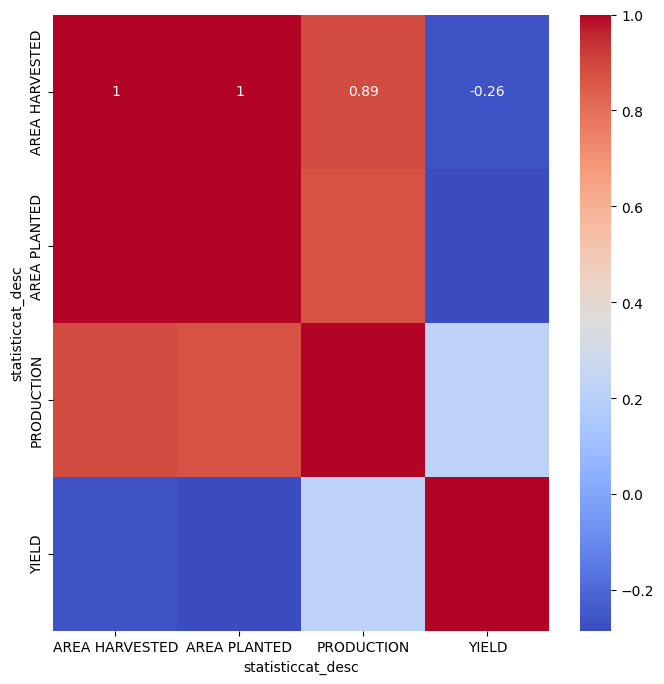

In [92]:
# Heatmap of correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Data Set: Local Climatological Data (LCD)

In [93]:
# Read the CSV file into a dataframe
lcd_df = pd.read_csv('data\LCD_Columbus_Bakalar_Municipal_Airport_Indiana_US.csv', low_memory=False)

In [94]:
# Describe the dataframe
lcd_df.describe()

,STATION,AWND,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,BackupElevationUnit,BackupEquipment,BackupLatitude,...,ShortDurationPrecipitationValue045,ShortDurationPrecipitationValue060,ShortDurationPrecipitationValue080,ShortDurationPrecipitationValue100,ShortDurationPrecipitationValue120,ShortDurationPrecipitationValue150,ShortDurationPrecipitationValue180,Sunrise,Sunset,WindEquipmentChangeDate
count,6.194500e+04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1520.000000,1520.000000,0.0
mean,7.243631e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,644.807237,1865.667763,NaN
std,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.803298,101.719409,NaN
min,7.243631e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,516.000000,1720.000000,NaN
25%,7.243631e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,542.000000,1753.000000,NaN
50%,7.243631e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,636.000000,1854.000000,NaN
75%,7.243631e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,736.000000,1948.000000,NaN
max,7.243631e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,804.000000,2014.000000,NaN


In [95]:
# Display the first 5 rows of the dataframe
lcd_df.head()

,STATION,DATE,REPORT_TYPE,SOURCE,AWND,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,...,ShortDurationPrecipitationValue045,ShortDurationPrecipitationValue060,ShortDurationPrecipitationValue080,ShortDurationPrecipitationValue100,ShortDurationPrecipitationValue120,ShortDurationPrecipitationValue150,ShortDurationPrecipitationValue180,Sunrise,Sunset,WindEquipmentChangeDate
0,72436313803,2014-01-01T07:50:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,72436313803,2014-01-01T08:50:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,72436313803,2014-01-01T09:50:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,72436313803,2014-01-01T10:50:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,72436313803,2014-01-01T11:50:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
# Display a sample of 10 rows
lcd_df.sample(10)

,STATION,DATE,REPORT_TYPE,SOURCE,AWND,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,...,ShortDurationPrecipitationValue045,ShortDurationPrecipitationValue060,ShortDurationPrecipitationValue080,ShortDurationPrecipitationValue100,ShortDurationPrecipitationValue120,ShortDurationPrecipitationValue150,ShortDurationPrecipitationValue180,Sunrise,Sunset,WindEquipmentChangeDate
14700,72436313803,2016-08-10T23:59:00,SOD,O,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,553.0,1944.0,NaN
39821,72436313803,2020-06-12T08:45:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40187,72436313803,2020-07-02T12:45:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48606,72436313803,2021-10-19T08:45:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8289,72436313803,2015-06-17T17:45:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4339,72436313803,2014-10-05T18:55:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28343,72436313803,2018-09-13T19:45:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37987,72436313803,2020-03-01T07:45:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60413,72436313803,2023-08-20T07:45:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
600,72436313803,2014-02-11T12:57:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
# Display the info of the dataframe
lcd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61945 entries, 0 to 61944
Columns: 124 entries, STATION to WindEquipmentChangeDate
dtypes: float64(106), int64(1), object(17)
memory usage: 58.6+ MB


In [98]:
# Remove columns that are missing more than 50% of the data
lcd_df = lcd_df.dropna(thresh=0.5*len(lcd_df), axis=1)
lcd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61945 entries, 0 to 61944
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   STATION                    61945 non-null  int64  
 1   DATE                       61945 non-null  object 
 2   REPORT_TYPE                61945 non-null  object 
 3   SOURCE                     61945 non-null  object 
 4   HourlyAltimeterSetting     60237 non-null  object 
 5   HourlyDewPointTemperature  58542 non-null  object 
 6   HourlyDryBulbTemperature   60296 non-null  object 
 7   HourlyRelativeHumidity     58498 non-null  float64
 8   HourlySkyConditions        57990 non-null  object 
 9   HourlyStationPressure      57896 non-null  object 
 10  HourlyVisibility           59924 non-null  object 
 11  HourlyWetBulbTemperature   56043 non-null  float64
 12  HourlyWindDirection        60306 non-null  object 
 13  HourlyWindSpeed            60277 non-null  obj

In [99]:
lcd_df.sample(10)

,STATION,DATE,REPORT_TYPE,SOURCE,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyRelativeHumidity,HourlySkyConditions,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,REM,REPORT_TYPE.1,SOURCE.1
59384,72436313803,2023-06-23T12:45:00,FM-15,7,29.96,59,73,61.0,BKN:07 44 OVC:08 50,29.26,10.00,64.0,000,0,MET07906/23/23 12:45:02 METAR KBAK 231745Z 000...,FM-15,7
18824,72436313803,2017-03-28T18:45:00,FM-15,7,30.09,50,54,88.0,OVC:08 26,29.38,10.00,52.0,020,8,MET07203/28/17 18:45:02 METAR KBAK 282345Z 020...,FM-15,7
50960,72436313803,2022-02-28T18:45:00,FM-15,4,30.10,23,46,40.0,NaN,NaN,10.00,NaN,210,16,MET049METAR KBAK 282345Z 21014KT 10SM CLR 08/M...,FM-15,4
13465,72436313803,2016-06-03T09:46:00,FM-15,7,30.08,66,72,83.0,SCT:04 230,29.37,10.00,68.0,000,0,MET07206/03/16 09:46:02 METAR KBAK 031446Z 000...,FM-15,7
43552,72436313803,2021-01-07T15:45:00,FM-15,7,30.21,25,37,60.0,OVC:08 35,29.50,10.00,32.0,060,17,MET07301/07/21 15:45:02 METAR KBAK 072045Z 060...,FM-15,7
21157,72436313803,2017-08-06T08:47:00,FM-15,7,30.08,59,64,83.0,OVC:08 90,29.37,10.00,61.0,000,0,MET07208/06/17 08:47:02 METAR KBAK 061347Z 000...,FM-15,7
59801,72436313803,2023-07-16T20:45:00,FM-15,7,29.92,68,75,78.0,CLR:00,29.22,3.00,70.0,000,0,MET07607/16/23 20:45:01 METAR KBAK 170145Z 000...,FM-15,7
54477,72436313803,2022-09-17T12:45:00,FM-15,7,30.14,59,82,45.0,SCT:04 48 SCT:04 65,29.43,10.00,68.0,210,11,MET07909/17/22 12:45:02 METAR KBAK 171745Z 210...,FM-15,7
51204,72436313803,2022-03-14T19:45:00,FM-15,7,30.19,25,50,37.0,CLR:00,29.48,10.00,40.0,180,6,MET07003/14/22 19:45:01 METAR KBAK 150045Z 180...,FM-15,7
25383,72436313803,2018-04-01T06:47:00,FM-15,7,30.21,NaN,37,NaN,BKN:07 28,29.50,10.00,NaN,010,6,MET06904/01/18 06:47:01 METAR KBAK 011147Z 010...,FM-15,7


# Data Set: USA Facts Dataset

### Data Source

In [100]:
# Read the CSV file into a dataframe
precip_df = pd.read_csv(r'data\USAFacts_Ripley_County_Indiana_Precipitation.csv', low_memory=False, quotechar='"', encoding='utf-8')

### Data Wrangling/Cleaning

In [101]:
# Remove the 0 from the column names and trim the column names
precip_df.columns = precip_df.columns.str.replace('0', '').str.strip()
precip_df.columns

Index(['AGENCY', 'DATA', 'DATA TYPE', 'LOCATION', 'LOCATION TYPE', 'SOURCE',
       'SOURCE TYPE', 'SUBJECT', 'TIME', 'TIME TYPE'],
      dtype='object')

In [102]:
# Create a new column 'year' from the 'time' column
precip_df['YEAR'] = precip_df['TIME'].str[:4].astype('int64')
precip_df.head()

,AGENCY,DATA,DATA TYPE,LOCATION,LOCATION TYPE,SOURCE,SOURCE TYPE,SUBJECT,TIME,TIME TYPE,YEAR
0,National Centers for Environmental Information,0.32,STRING,Ripley,COUNTY,https://www.ncei.noaa.gov/pub/data/cirs/climdiv/,URL,Precipitation MA Split By FIPS,1910-03,ISO_DATE,1910
1,National Centers for Environmental Information,1.83,STRING,Ripley,COUNTY,https://www.ncei.noaa.gov/pub/data/cirs/climdiv/,URL,Precipitation MA Split By FIPS,1937-11,ISO_DATE,1937
2,National Centers for Environmental Information,3.40,STRING,Ripley,COUNTY,https://www.ncei.noaa.gov/pub/data/cirs/climdiv/,URL,Precipitation MA Split By FIPS,1923-03,ISO_DATE,1923
3,National Centers for Environmental Information,1.71,STRING,Ripley,COUNTY,https://www.ncei.noaa.gov/pub/data/cirs/climdiv/,URL,Precipitation MA Split By FIPS,1916-11,ISO_DATE,1916
4,National Centers for Environmental Information,6.65,STRING,Ripley,COUNTY,https://www.ncei.noaa.gov/pub/data/cirs/climdiv/,URL,Precipitation MA Split By FIPS,1906-03,ISO_DATE,1906


In [103]:
# Rename the 'DATA' column to 'PRECIPITATION'
precip_df.rename(columns={'DATA':'PRECIPITATION'}, inplace=True)
precip_df.head()

,AGENCY,PRECIPITATION,DATA TYPE,LOCATION,LOCATION TYPE,SOURCE,SOURCE TYPE,SUBJECT,TIME,TIME TYPE,YEAR
0,National Centers for Environmental Information,0.32,STRING,Ripley,COUNTY,https://www.ncei.noaa.gov/pub/data/cirs/climdiv/,URL,Precipitation MA Split By FIPS,1910-03,ISO_DATE,1910
1,National Centers for Environmental Information,1.83,STRING,Ripley,COUNTY,https://www.ncei.noaa.gov/pub/data/cirs/climdiv/,URL,Precipitation MA Split By FIPS,1937-11,ISO_DATE,1937
2,National Centers for Environmental Information,3.40,STRING,Ripley,COUNTY,https://www.ncei.noaa.gov/pub/data/cirs/climdiv/,URL,Precipitation MA Split By FIPS,1923-03,ISO_DATE,1923
3,National Centers for Environmental Information,1.71,STRING,Ripley,COUNTY,https://www.ncei.noaa.gov/pub/data/cirs/climdiv/,URL,Precipitation MA Split By FIPS,1916-11,ISO_DATE,1916
4,National Centers for Environmental Information,6.65,STRING,Ripley,COUNTY,https://www.ncei.noaa.gov/pub/data/cirs/climdiv/,URL,Precipitation MA Split By FIPS,1906-03,ISO_DATE,1906


In [104]:
# Calculate the mean precipitation for each year using the 'PRECIPITATION' and 'YEAR' columns
precip_df_mean = precip_df[['PRECIPITATION', 'YEAR']].groupby('YEAR').mean()
precip_df_mean.head()


,PRECIPITATION
YEAR,
1895,2.682500
1896,3.402500
1897,3.943333
1898,4.281667
1899,3.500000


In [105]:
# Filter the dataframe to include only the years 2013-2023
precip_df_mean = precip_df_mean.loc[2013:2023]
precip_df_mean.head()

,PRECIPITATION
YEAR,
2013,3.755000
2014,3.655000
2015,4.243333
2016,3.939167
2017,4.392500


### Data Visualization

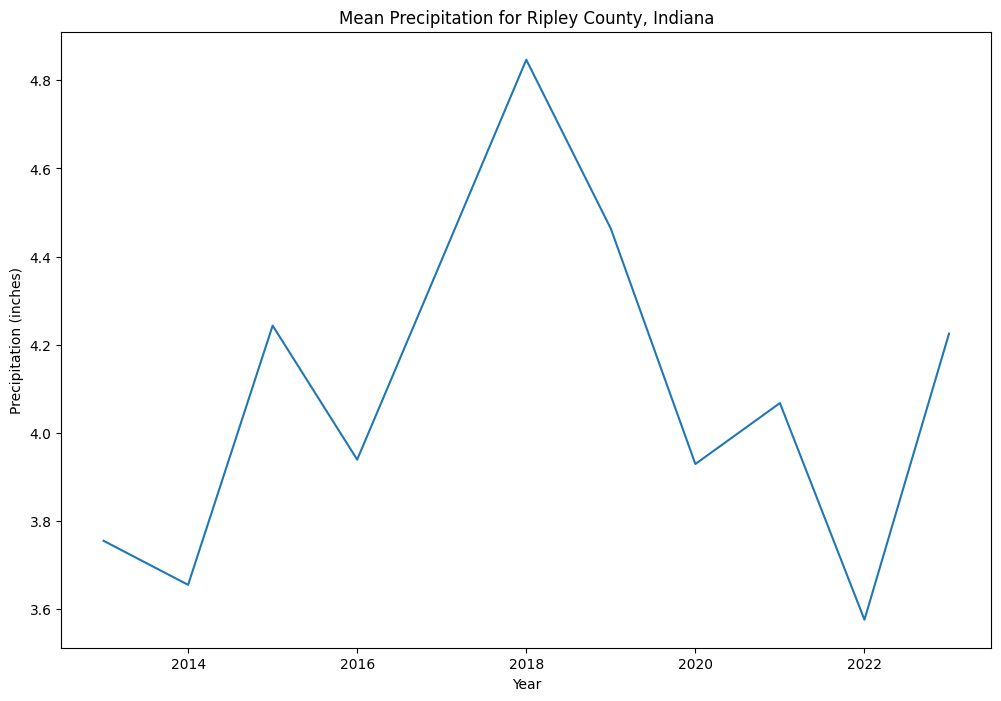

In [106]:
# Plot the mean precipitation for each year
plt.figure(figsize=(12, 8))
plt.plot(precip_df_mean.index, precip_df_mean['PRECIPITATION'])
plt.xlabel('Year')
plt.ylabel('Precipitation (inches)')
plt.title('Mean Precipitation for Ripley County, Indiana')
plt.show()

# Data Set: IndyStar, Ripley County, Indiana Aggregated Weather Data

### Data Source

In [107]:
indy_star_summary_url = 'https://data.indystar.com/weather-data/ripley-county/18137/2023-07-01/?syear=1895&eyear=2023#summary'
indy_star_table_url = 'https://data.indystar.com/weather-data/ripley-county/18137/2023-07-01/table/'

In [108]:
page = requests.get(indy_star_table_url)
soup = BeautifulSoup(page.content, 'html.parser')
#print(soup.prettify())

In [109]:
import lxml.html as lh

tables = soup.find_all('table')

# Read the table into a dataframe
indy_star_df = pd.read_html(io.StringIO(str(tables)))[0]
indy_star_df.head()



,Month,Avg. Temp.,Min. Temp.,Max. Temp.,Precipitation,Heating Degree Days,Cooling Degree Days
0,"20231001October, 2023",56.9,46.4,67.4,2.66,267.0,16.0
1,"20230901September, 2023",68.0,56.4,79.6,1.42,42.0,133.0
2,"20230801August, 2023",72.8,62.8,82.7,3.25,8.0,249.0
3,"20230701July, 2023",74.6,64.7,84.4,6.95,NaN,301.0
4,"20230601June, 2023",68.8,57.4,80.2,2.31,29.0,142.0


### Data Wrangling/Cleaning

In [110]:
# Calculate the 'Year' column from the 'Month' column
indy_star_df['Year'] = indy_star_df['Month'].str[-4:].astype('int64')
indy_star_df.head()

,Month,Avg. Temp.,Min. Temp.,Max. Temp.,Precipitation,Heating Degree Days,Cooling Degree Days,Year
0,"20231001October, 2023",56.9,46.4,67.4,2.66,267.0,16.0,2023
1,"20230901September, 2023",68.0,56.4,79.6,1.42,42.0,133.0,2023
2,"20230801August, 2023",72.8,62.8,82.7,3.25,8.0,249.0,2023
3,"20230701July, 2023",74.6,64.7,84.4,6.95,NaN,301.0,2023
4,"20230601June, 2023",68.8,57.4,80.2,2.31,29.0,142.0,2023


In [111]:
# Calculate the mean precipitation for each year using the 'Precipitation' and 'Year' columns
indy_star_df_mean = indy_star_df[['Precipitation', 'Year']].groupby('Year').mean()
# Filter the dataframe to include only the years 2013-2023
indy_star_df_mean = indy_star_df_mean.loc[2013:2023]
indy_star_df_mean.head()


,Precipitation
Year,
2013,3.755000
2014,3.655000
2015,4.243333
2016,3.939167
2017,4.392500


### Data Visualization

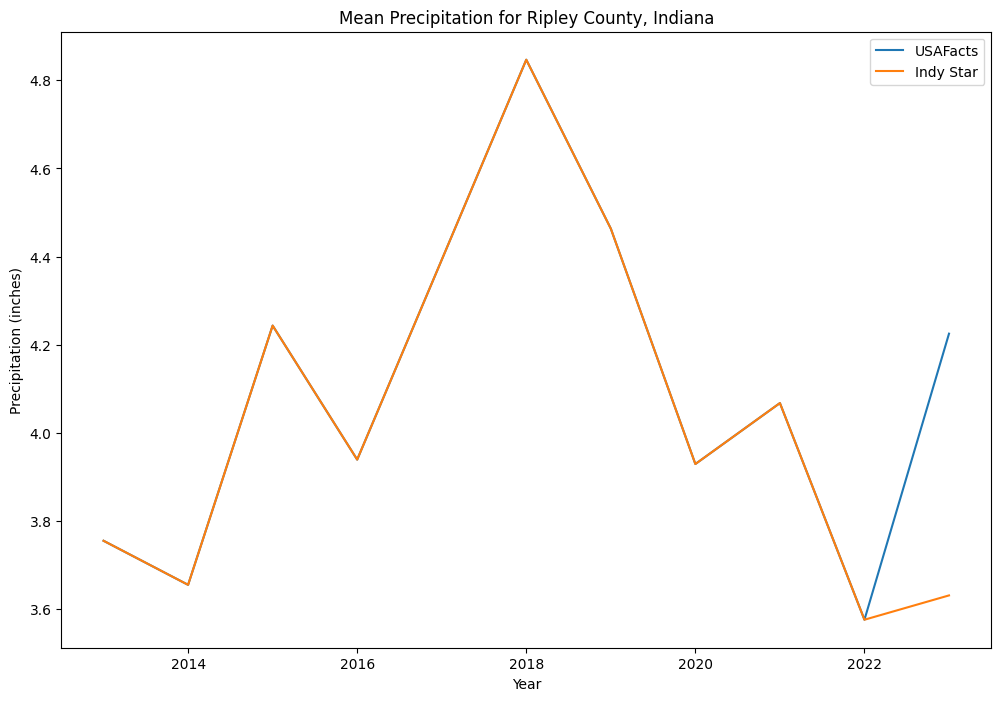

In [112]:
# Compare the mean precipitation for each year from the two dataframes
plt.figure(figsize=(12, 8))
plt.plot(precip_df_mean.index, precip_df_mean['PRECIPITATION'], label='USAFacts')
plt.plot(indy_star_df_mean.index, indy_star_df_mean['Precipitation'], label='Indy Star')
plt.xlabel('Year')
plt.ylabel('Precipitation (inches)')
plt.title('Mean Precipitation for Ripley County, Indiana')
plt.legend()
plt.show()

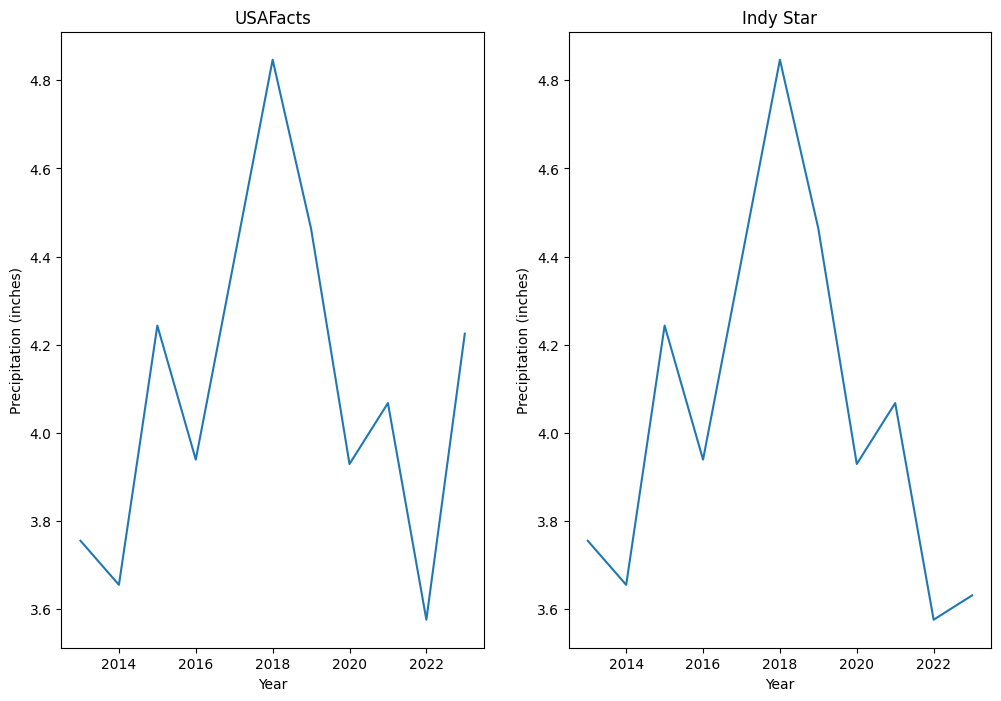

In [113]:
# Display the mean preciptation for each year from the two dataframes side-by-side
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(precip_df_mean.index, precip_df_mean['PRECIPITATION'])
plt.xlabel('Year')
plt.ylabel('Precipitation (inches)')
plt.title('USAFacts')
plt.subplot(1, 2, 2)
plt.plot(indy_star_df_mean.index, indy_star_df_mean['Precipitation'])
plt.xlabel('Year')
plt.ylabel('Precipitation (inches)')
plt.title('Indy Star')
plt.show()

# Combining the Data Sets

In [114]:
# Combine the nass_pivoted_df and precip_df dataframes
combined_df = pd.concat([nass_pivoted_df, precip_df_mean], axis=1)
combined_df.head()

,AREA HARVESTED,AREA PLANTED,PRODUCTION,YIELD,PRECIPITATION
2013,45000.0,46000.0,7659000.0,170.2,3.755000
2014,47500.0,48000.0,8470000.0,178.3,3.655000
2015,46000.0,47000.0,7300000.0,158.7,4.243333
2016,38000.0,39000.0,6000000.0,157.9,3.939167
2017,38300.0,39000.0,7120000.0,185.9,4.392500


In [115]:
# Calculate the correlation matrix
corr_matrix = combined_df.corr()
corr_matrix

,AREA HARVESTED,AREA PLANTED,PRODUCTION,YIELD,PRECIPITATION
AREA HARVESTED,1.000000,0.999105,0.885649,-0.262928,-0.223040
AREA PLANTED,0.999105,1.000000,0.873839,-0.285006,-0.216853
PRODUCTION,0.885649,0.873839,1.000000,0.213026,-0.064674
YIELD,-0.262928,-0.285006,0.213026,1.000000,0.380355
PRECIPITATION,-0.223040,-0.216853,-0.064674,0.380355,1.000000


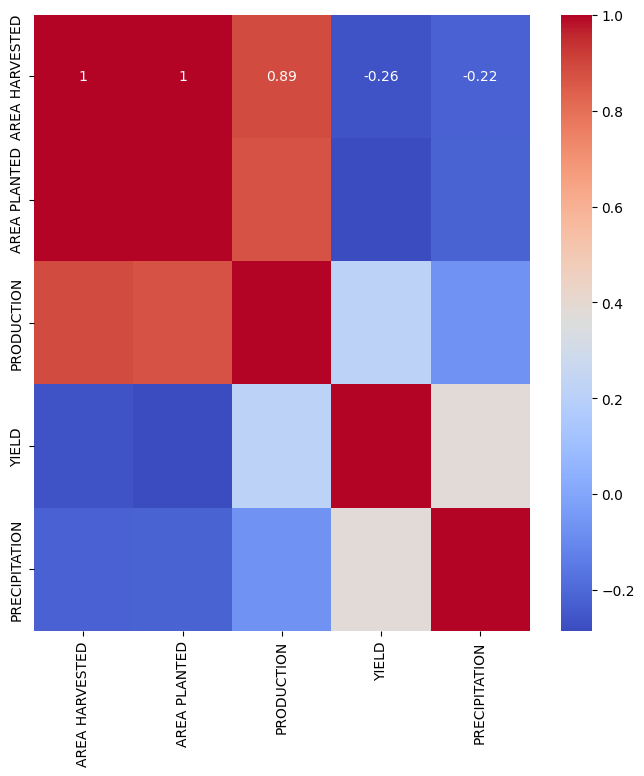

In [116]:
# Heatmap of correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Check Point #2 Questions

#### Exploratory Data Analysis (EDA)

What insights and interesting information are you able to extract at this stage?
- I did not find the correlation between crop yield and annual precipation that I had expected.  I might filter the average precipitation to a "growing" season, e.g., May - October.

What are the distributions of my variables?
- I am working with a limited amount of data, aggregated to an annual basis.  The distribution of my variables is difficult to know.

Are there any correlations between my variables?
- There is a high correlation between 'ACRE PLANTED' and 'ACRE HARVESTED', but the remaining variables show low correlation.

What issues can you see in your data at this point?
- The data doesn't seem to support my hypothesis.

Are there any outliers or anomalies? are they relevant to your analysis? or should they be removed?
- Not really, but I have data from 2010 to 2023.  I will remove years 2010, 2011, and 2012 to keep a 10-year range.

Are there any missing values? how are you going to deal with them?
- Yes, the Local Climatological Data (LCD) was missing a lot of columns.  After review the remaining data set, I determined that it was unuseful and searched for other data sets.

Are there any duplicate values? how are you going to deal with them?
- I did not find any duplication within these data sets.  If I had, I would have deduped that data.

Are there any data types that need to be changed?
- Yes, I changed some data types from object or string to Int64 or Float.

#### Data Cleaning and Transformation

Each section has a Data Wrangling/Cleaning section.

Overall, here is my explanation of my process.
* Missing values
    * I did not have missing values except for the LCD dataset, which I decided to not use.
* Duplicate values
    * I did not have duplicate values.  If I had, I would have deduped the data.
* Anomalies and Outliers
    * Technically, I did not see any anomalies or outliers, but I will limit my data to a 10-year range, 2013-2023.
* Data type transformations
    * I converted some Object and String variables to Int64 or Float dtypes.

#### Prior Feedback and Updates

* Have you received any feedback?
    * I have not received feedback from others.
* What changes have you made to your project based on this feedback?
    * Not applicable at this time.

# Checkpoint 3: Machine Learning (Regression/Classification)

1. Machine Learning Plan

* What type of machine learning model are you planning to use?
    * I plan to use linear regression to predict the yield for 2023.
* What are the challenges you have identified/are you anticipating in building your machine learning model?
    * One challenge I have is the almost non-existent correlation between precipitation, yield, and area planted.  Since corn needs moisture/rainfall to help it grow, there must be a correlation that exists.  Another challenge is I do not have the data for 2023.  I can only assume that a prediction will be relevant and statistically signficant with the current data.
* How are you planning to address these challenges?
    * I'm unsure at this time.  I need to think about whether this dataset is viable for a machine learning algorthim and predictive model.  There are many factors that are not part of the dataset that factor into this outcome.

2. Machine Learning Implementation Process

    (Ask, Prepare, Process, Analyze, Evaluate, Share)

* This includes:
    * EDA process that allows for identifying issues
    * Splitting the dataset into training and test sets
    * Data cleaning process using sci-kit learn pipelines
        * Data imputation
        * Data Scaling and Normalization
        * Handling of Categorical Data
    * Testing multiple algorithms and models
    * Evaluating the different models and choosing one.

3. Prior Feedback and Updates
    * What feedback did you receive from your peers and/or the teaching team?
        * I want to thank Christopher for his feedback.  Though the feedback did not provide any constructive critism, I appreciate the encouragement.
    * What changes have you made to your project based on this feedback?
        * I did not make any changes based on others' feedback.  However, I am evaluating my project sources and may determine to modify the project based on the usage of machine learning.

# Machine Learning Process

## Exploratory Data Analysis

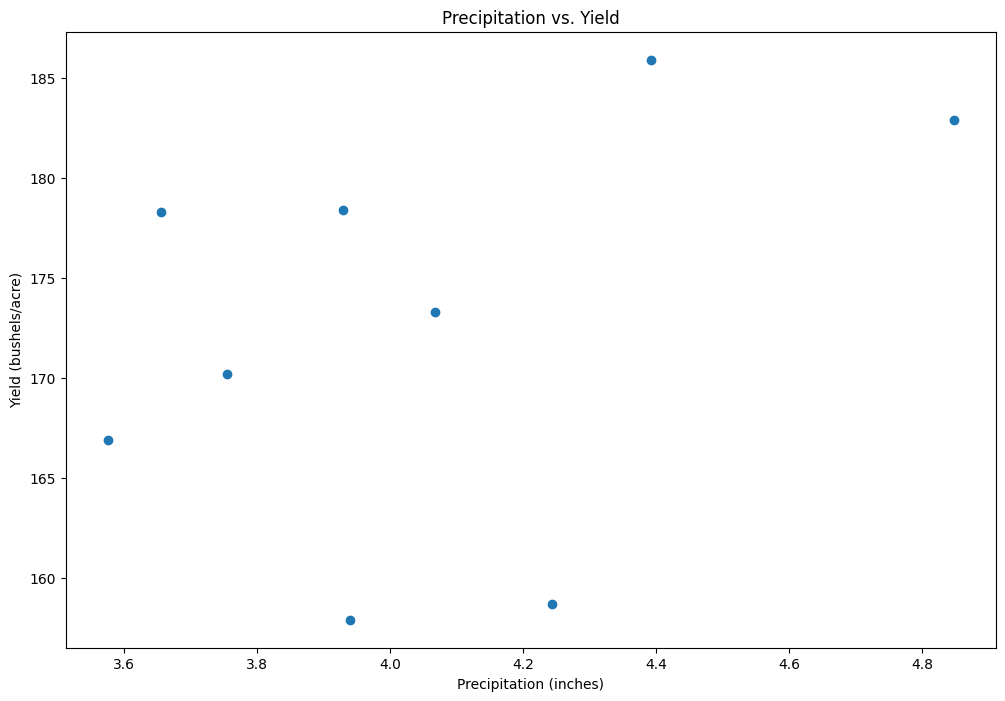

In [119]:
# Display a scatter plot of the 'PRECIPITATION' and 'YIELD' columns
plt.figure(figsize=(12, 8))
plt.scatter(combined_df['PRECIPITATION'], combined_df['YIELD'])
plt.xlabel('Precipitation (inches)')
plt.ylabel('Yield (bushels/acre)')
plt.title('Precipitation vs. Yield')
plt.show()

With the limited amount of data points, approximately 10 years of aggregated data, you can vaguely see a relationship between the annual rainfall and the annual yield of corn in Ripley county, Indiana.

In [122]:
# Correlation matrix of combined_df
corr_matrix = combined_df.corr()
corr_matrix

,AREA HARVESTED,AREA PLANTED,PRODUCTION,YIELD,PRECIPITATION
AREA HARVESTED,1.000000,0.999105,0.885649,-0.262928,-0.223040
AREA PLANTED,0.999105,1.000000,0.873839,-0.285006,-0.216853
PRODUCTION,0.885649,0.873839,1.000000,0.213026,-0.064674
YIELD,-0.262928,-0.285006,0.213026,1.000000,0.380355
PRECIPITATION,-0.223040,-0.216853,-0.064674,0.380355,1.000000


c:\Users\kellej6\source\repos\IT4063C-Fall23\final-project-kellej6\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kellej6\source\repos\IT4063C-Fall23\final-project-kellej6\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kellej6\source\repos\IT4063C-Fall23\final-project-kellej6\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kellej6\source\repos\IT4063C-Fall23\final-project-kellej6\.venv\Lib\site-packag

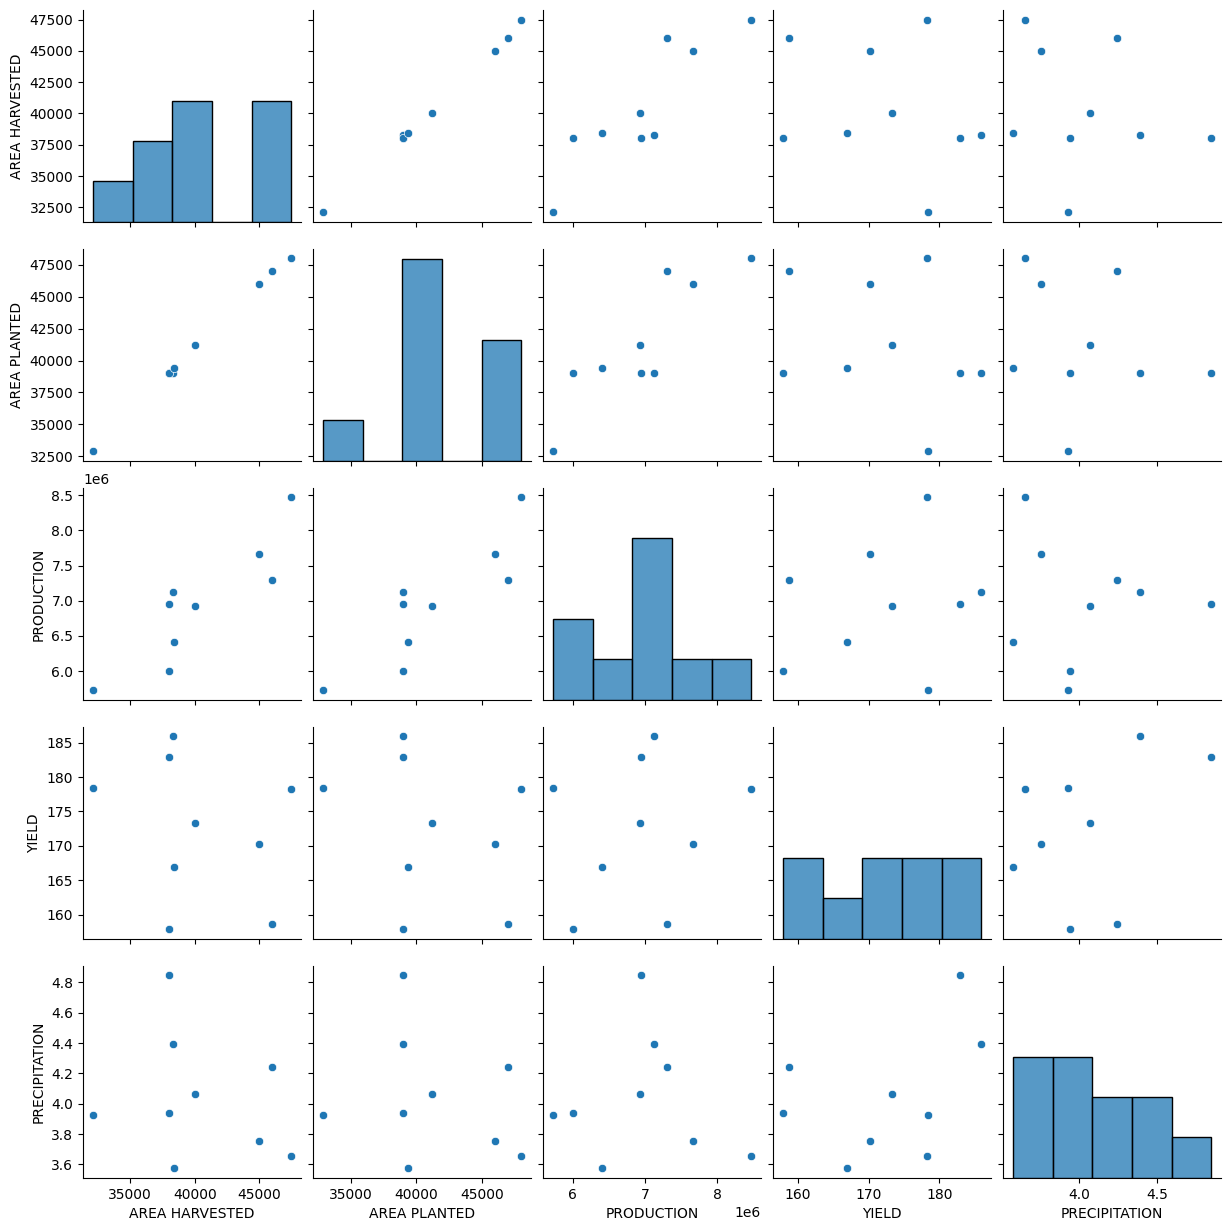

In [123]:
# Display a pairplot of the combined_df dataframe
sns.pairplot(combined_df)
plt.show()

With the combinded data of: area planted, area harvested, production, yield, and precipitation, no further data imputation or cleansing is required.  This scatter matrix shows the strong correlation between area harvested and area planted, but no correlation between other variables.  However, there is obvious correlation between area harvested and production and/or yield.  Precipitation also plays a factor in the amount of production and/or yield.

## Prepare

In [125]:
# Split the combined_df dataframe for training and testing
from sklearn.model_selection import train_test_split

X = combined_df.drop(columns=['YIELD'])
y = combined_df['YIELD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (8, 4)
X_test shape: (3, 4)
y_train shape: (8,)
y_test shape: (3,)


## Process

In [ ]:
# Process pipeline for numeric features
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Process pipeline for categorical features
from sklearn.preprocessing import OneHotEncoder

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Identify numeric and categorical features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Create a preprocessor pipeline
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create a pipeline for the model
from sklearn.ensemble import RandomForestRegressor

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Fit the model
model.fit(X_train, y_train)

# Predict the yield for the test data
y_pred = model.predict(X_test)

# Calculate the mean absolute error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate the mean absolute percentage error
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error: {mape}')

# Calculate the root mean squared error
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

# Calculate the coefficient of determination
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'Coefficient of Determination: {r2}')

# Display the feature importances
importances = model.named_steps['regressor'].feature_importances_
feature_names = model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names(categorical_features)
feature_names = np.concatenate([numeric_features, feature_names])
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.bar(feature_names[sorted_indices], importances[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()


## Analyze

In [ ]:
# Create a Linear Regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Calculate the R^2 score for the training and testing data
print(f'Training R^2 score: {lin_reg.score(X_train, y_train)}')
print(f'Testing R^2 score: {lin_reg.score(X_test, y_test)}')

# Calculate the mean absolute error for the training and testing data
from sklearn.metrics import mean_absolute_error

y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)
print(f'Training MAE: {mean_absolute_error(y_train, y_train_pred)}')
print(f'Testing MAE: {mean_absolute_error(y_test, y_test_pred)}')

# Calculate the mean squared error for the training and testing data
from sklearn.metrics import mean_squared_error

print(f'Training MSE: {mean_squared_error(y_train, y_train_pred)}')
print(f'Testing MSE: {mean_squared_error(y_test, y_test_pred)}')

# Calculate the root mean squared error for the training and testing data
from sklearn.metrics import mean_squared_error

print(f'Training RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred))}')
print(f'Testing RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred))}')

# Calculate the mean absolute percentage error for the training and testing data
from sklearn.metrics import mean_absolute_percentage_error

print(f'Training MAPE: {mean_absolute_percentage_error(y_train, y_train_pred)}')
print(f'Testing MAPE: {mean_absolute_percentage_error(y_test, y_test_pred)}')

# Calculate the mean absolute scaled error for the training and testing data
from sklearn.metrics import mean_absolute_error

print(f'Training MASE: {mean_absolute_error(y_train, y_train_pred) / mean_absolute_error(y_train, y_train.mean())}')
print(f'Testing MASE: {mean_absolute_error(y_test, y_test_pred) / mean_absolute_error(y_test, y_test.mean())}')

# Calculate the coefficient of determination for the training and testing data
from sklearn.metrics import r2_score

print(f'Training R^2 score: {r2_score(y_train, y_train_pred)}')
print(f'Testing R^2 score: {r2_score(y_test, y_test_pred)}')

# Calculate the adjusted R^2 score for the training and testing data

def adjusted_r2_score(y_true, y_pred, n, p):
    return 1 - ((1 - r2_score(y_true, y_pred)) * (n - 1) / (n - p - 1))

print(f'Training Adjusted R^2 score: {adjusted_r2_score(y_train, y_train_pred, X_train.shape[0], X_train.shape[1])}'
)
print(f'Testing Adjusted R^2 score: {adjusted_r2_score(y_test, y_test_pred, X_test.shape[0], X_test.shape[1])}'
)

In [ ]:
# Create a Ridge Regression model
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X_train, y_train)

# Calculate the R^2 score for the training and testing data
print(f'Training R^2 score: {ridge_reg.score(X_train, y_train)}')
print(f'Testing R^2 score: {ridge_reg.score(X_test, y_test)}')

# Calculate the mean absolute error for the training and testing data
from sklearn.metrics import mean_absolute_error

y_train_pred = ridge_reg.predict(X_train)
y_test_pred = ridge_reg.predict(X_test)

print(f'Training MAE: {mean_absolute_error(y_train, y_train_pred)}')
print(f'Testing MAE: {mean_absolute_error(y_test, y_test_pred)}')

# Calculate the mean squared error for the training and testing data
from sklearn.metrics import mean_squared_error

print(f'Training MSE: {mean_squared_error(y_train, y_train_pred)}')
print(f'Testing MSE: {mean_squared_error(y_test, y_test_pred)}')

# Calculate the root mean squared error for the training and testing data
from sklearn.metrics import mean_squared_error

print(f'Training RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred))}')
print(f'Testing RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred))}')

# Calculate the mean absolute percentage error for the training and testing data
from sklearn.metrics import mean_absolute_percentage_error

print(f'Training MAPE: {mean_absolute_percentage_error(y_train, y_train_pred)}')
print(f'Testing MAPE: {mean_absolute_percentage_error(y_test, y_test_pred)}')

# Calculate the mean absolute scaled error for the training and testing data
from sklearn.metrics import mean_absolute_error

print(f'Training MASE: {mean_absolute_error(y_train, y_train_pred) / mean_absolute_error(y_train, y_train.mean())}')
print(f'Testing MASE: {mean_absolute_error(y_test, y_test_pred) / mean_absolute_error(y_test, y_test.mean())}')

# Calculate the coefficient of determination for the training and testing data
from sklearn.metrics import r2_score

print(f'Training R^2 score: {r2_score(y_train, y_train_pred)}')
print(f'Testing R^2 score: {r2_score(y_test, y_test_pred)}')

# Calculate the adjusted R^2 score for the training and testing data

def adjusted_r2_score(y_true, y_pred, n, p):
    return 1 - ((1 - r2_score(y_true, y_pred)) * (n - 1) / (n - p - 1))

print(f'Training Adjusted R^2 score: {adjusted_r2_score(y_train, y_train_pred, X_train.shape[0], X_train.shape[1])}'
)
print(f'Testing Adjusted R^2 score: {adjusted_r2_score(y_test, y_test_pred, X_test.shape[0], X_test.shape[1])}'
)

# Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->
* Data source references listed above
* Bing Chat with GPT-4
* https://www.ncei.noaa.gov/data/local-climatological-data/doc/LCD_documentation.pdf
* https://www.ncdc.noaa.gov/cdo-web/datasets
* https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
* https://stackoverflow.com/questions/20638006/convert-list-of-dictionaries-to-a-pandas-dataframe
* Github Copilot
* https://stackoverflow.com/questions/14745022/how-to-split-a-column-into-two-columns

In [117]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 21609 bytes to source.py
